FURTRISTIC URBAN TRAFFIC AND SUSTAINABILITY 

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import joblib

In [25]:
df = pd.read_csv('futuristic_city_traffic.CSV')
df

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027,0.3840
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122,0.5526
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568,0.0564
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116,0.5079


In [26]:
df.head()

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


In [28]:
df.isnull().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [29]:
X = df.drop('Traffic Density', axis=1)
y = df['Traffic Density']

In [30]:
X

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934
...,...,...,...,...,...,...,...,...,...,...
1219562,SolarisVille,Autonomous Vehicle,Electromagnetic Storm,Booming,Wednesday,13,75.7534,0,0,60.6027
1219563,MetropolisX,Drone,Snowy,Booming,Saturday,1,24.7660,0,0,14.8122
1219564,Neuroburg,Autonomous Vehicle,Snowy,Booming,Monday,19,75.6292,0,0,61.8568
1219565,MetropolisX,Autonomous Vehicle,Clear,Booming,Monday,1,52.7983,0,0,85.7116


In [31]:
y

0          0.5241
1          0.3208
2          0.0415
3          0.1811
4          0.4544
            ...  
1219562    0.3840
1219563    0.5526
1219564    0.0564
1219565    0.5079
1219566    0.3182
Name: Traffic Density, Length: 1219567, dtype: float64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Basic Information
print("Basic Information:")
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

Basic Information:
Dataset Shape: (1219567, 11)

Data Types:
 City                      object
Vehicle Type              object
Weather                   object
Economic Condition        object
Day Of Week               object
Hour Of Day                int64
Speed                    float64
Is Peak Hour               int64
Random Event Occurred      int64
Energy Consumption       float64
Traffic Density          float64
dtype: object

Summary Statistics:
         Hour Of Day         Speed  Is Peak Hour  Random Event Occurred  \
count  1.219567e+06  1.219567e+06  1.219567e+06           1.219567e+06   
mean   1.150817e+01  5.994476e+01  1.546992e-01           4.988738e-02   
std    6.919071e+00  2.663203e+01  3.616178e-01           2.177123e-01   
min    0.000000e+00  6.693400e+00  0.000000e+00           0.000000e+00   
25%    6.000000e+00  3.753310e+01  0.000000e+00           0.000000e+00   
50%    1.200000e+01  5.847110e+01  0.000000e+00           0.000000e+00   
75%    1.700000e+01  

In [34]:
# Unique Values in Categorical Columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Unique Values in Categorical Columns:

Column: City
['SolarisVille' 'AquaCity' 'Neuroburg' 'Ecoopolis' 'TechHaven'
 'MetropolisX']

Column: Vehicle Type
['Drone' 'Flying Car' 'Autonomous Vehicle' 'Car']

Column: Weather
['Snowy' 'Solar Flare' 'Clear' 'Rainy' 'Electromagnetic Storm']

Column: Economic Condition
['Stable' 'Recession' 'Booming']

Column: Day Of Week
['Sunday' 'Wednesday' 'Thursday' 'Saturday' 'Monday' 'Friday' 'Tuesday']


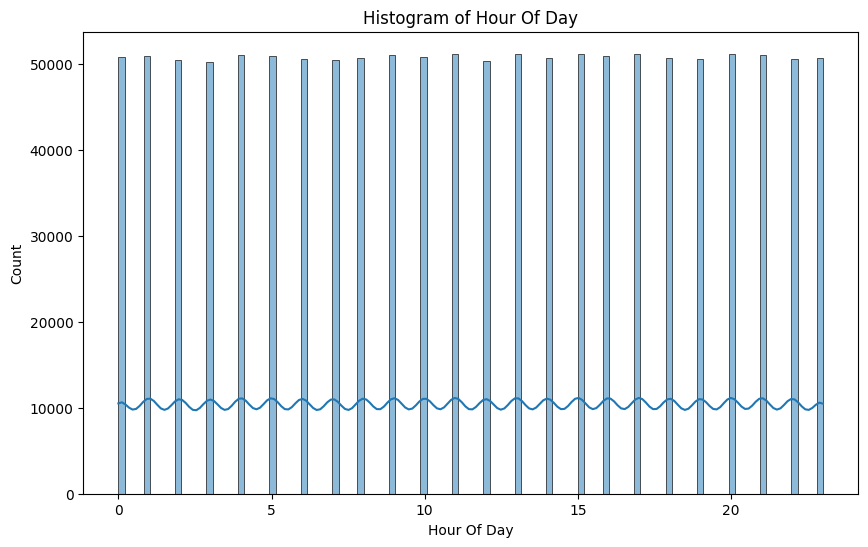

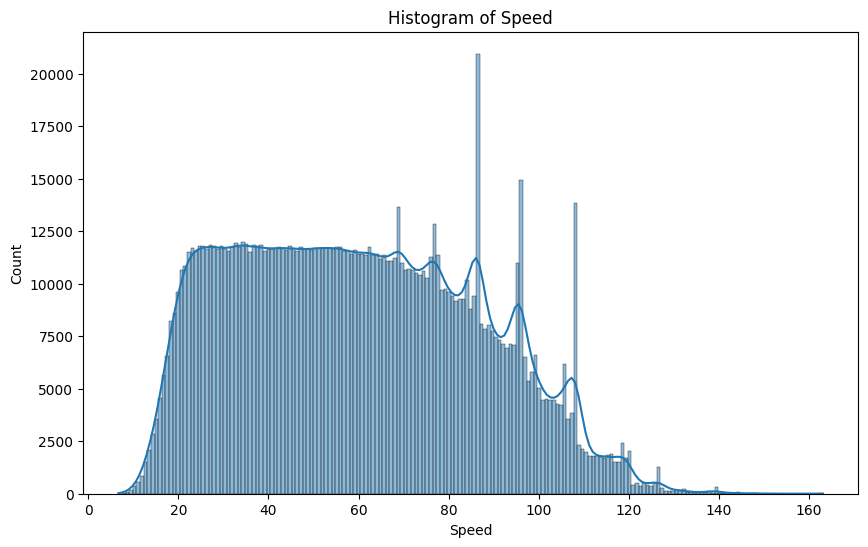

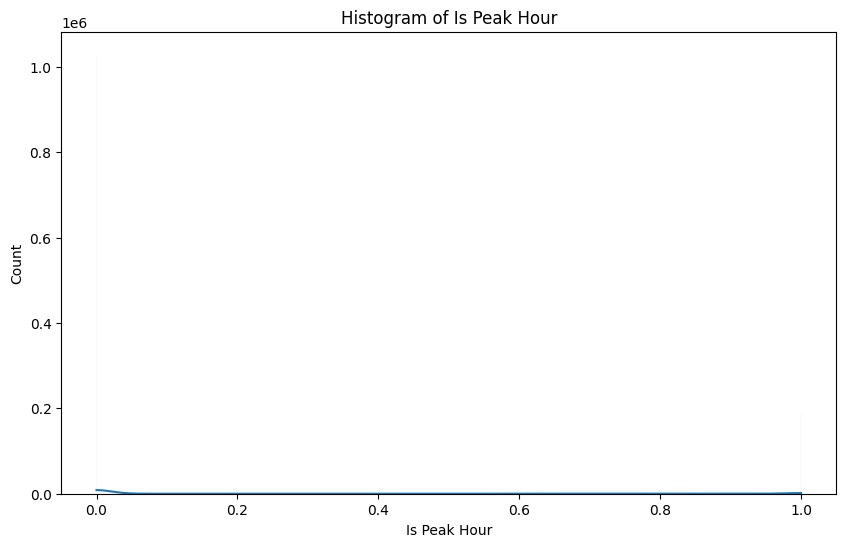

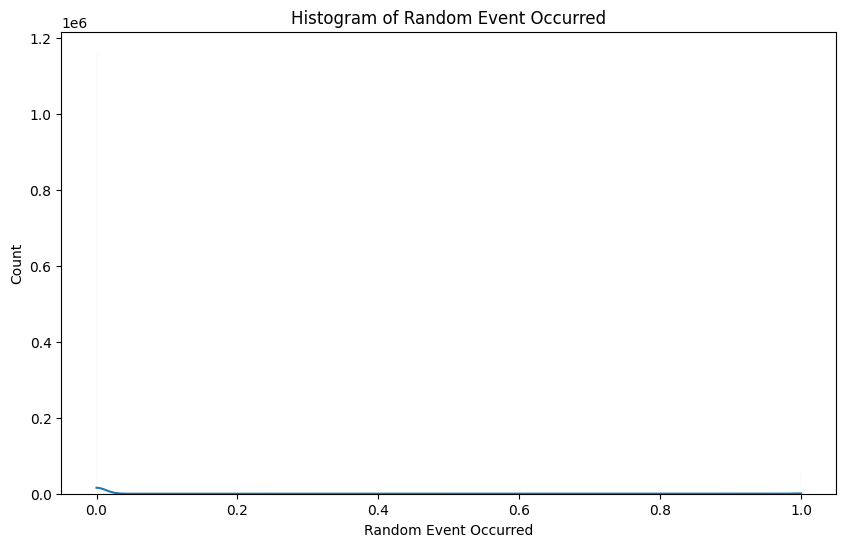

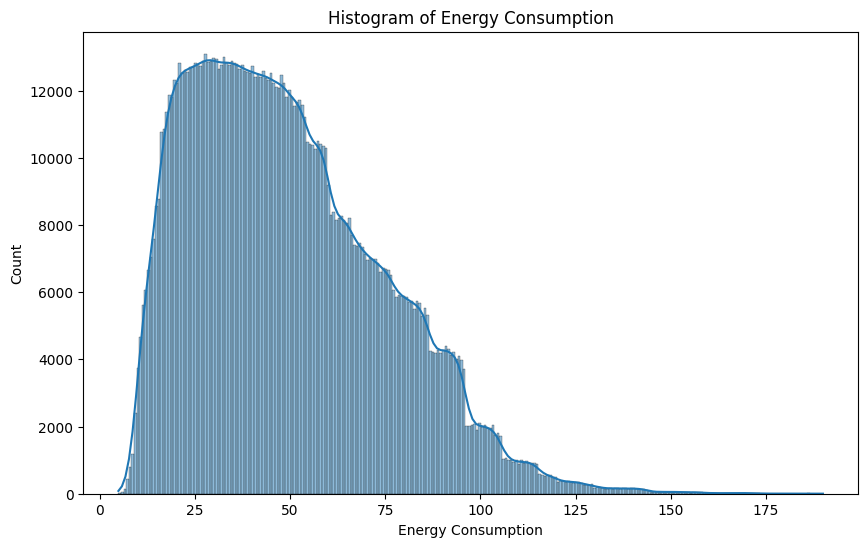

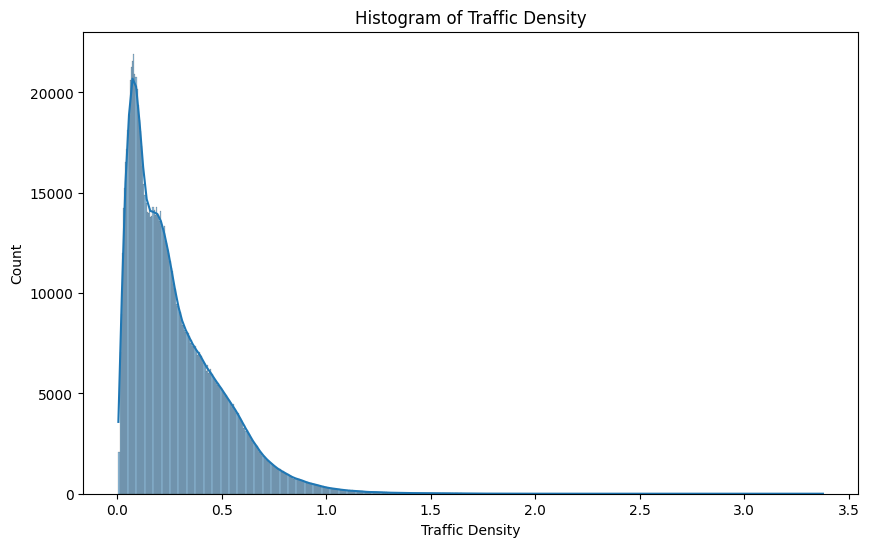

In [35]:
# Histograms for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

# Encode all object columns
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [37]:
# Split again after encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train model
model = XGBRegressor()
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [39]:
# Test data par prediction
y_pred = model.predict(X_test)

# Kuch predictions dekhne ke liye
print(y_pred[:10])

[0.24460778 0.29288962 0.5380255  0.526099   0.20398106 0.6591615
 0.20084567 0.26505208 0.34923786 0.22945257]


In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.7816272295415124
MAE: 0.06766888841202519
MSE: 0.010503272853116148


TRAINING THE MODEL

In [41]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Predicting the result

In [42]:
Y_pred = regressor.predict(X_test)

In [43]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
print(comparison.head(10))

        Actual  Predicted
847212  0.1965   0.356602
760122  0.2234   0.180760
678988  0.3949   0.294105
544510  0.4116   0.275762
203363  0.0897   0.275135
168857  0.8225   0.439554
966542  0.1888   0.355801
786174  0.2657   0.328083
859827  0.3979   0.178565
136385  0.2139   0.320215


In [44]:
import os

# Folder create karo agar exist nahi karta
os.makedirs('Traffic_Model', exist_ok=True)

from joblib import dump

with open('Traffic_Model/Linear_regression.pkl', 'wb') as f:
    dump(regressor, f)
    print("Model dumped successfully.")

Model dumped successfully.
